In [2]:
import os
import re
import cv2
import matplotlib.pyplot as plt

In [1]:
import sklearn

In [3]:
import numpy as np

In [5]:
import sys  
sys.path.insert(0, './gray_lib')

In [6]:
from gray_lib import *

In [7]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if not os.path.isfile(os.path.join(folder,filename)):
            continue
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images

In [8]:
def showImage(image):
    plt.imshow(image,cmap='gray')
    plt.show()

In [9]:
def get_training_data():
    path = './samples/DevanagariHandwrittenCharacterDataset/Train'
    regex = r'_(\d+)'
    characters = [(int(re.search(regex,name).group(1)),name,os.path.join(path,name)) for name in os.listdir(path) if os.path.isdir(os.path.join(path,name)) and name.startswith('character')]
    train_images = []
    train_labels = []
    for entry in characters:
        label,name,folder_path = entry
        imgs = load_images_from_folder(folder_path)
        train_labels.extend([label]*len(imgs))
        train_images.extend(imgs)
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    return train_images,train_labels

In [10]:
def get_testing_data():
    path = './samples/DevanagariHandwrittenCharacterDataset/Test'
    regex = r'_(\d+)'
    characters = [(int(re.search(regex,name).group(1)),name,os.path.join(path,name)) for name in os.listdir(path) if os.path.isdir(os.path.join(path,name)) and name.startswith('character')]
    test_images = []
    test_labels = []
    for entry in characters:
        label,name,folder_path = entry
        imgs = load_images_from_folder(folder_path)
        test_labels.extend([label]*len(imgs))
        test_images.extend(imgs)
    test_images = np.array(train_images)
    test_labels = np.array(train_labels)
    return test_images,test_labels

In [11]:
train_images,train_labels = get_training_data()
test_images,test_labels = get_testing_data()

In [12]:
train_labels = train_labels - 1

In [13]:
test_labels = test_labels - 1

In [14]:
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((61200, 32, 32), (61200, 32, 32), (61200,), (61200,))

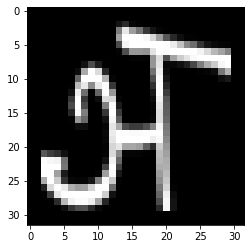

9

In [15]:
showImage(train_images[1])
train_labels[1]

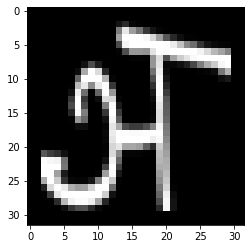

9

In [16]:
showImage(test_images[1])
test_labels[1]

In [17]:
def getCharFromLabel(label):
    alphabets = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह क्ष त्र ज्ञ'.split(' ')
    return alphabets[label]

In [18]:
getCharFromLabel(9)

'ञ'

In [19]:
train_images,train_labels = sklearn.utils.shuffle(train_images,train_labels)
test_images,test_labels = sklearn.utils.shuffle(test_images,test_labels)

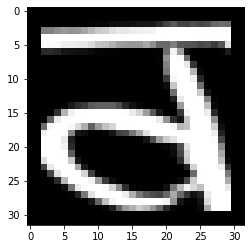

In [20]:
showImage(train_images[0])

In [21]:
train_labels[0]

28

In [32]:
train_images[0].shape

(32, 32)

In [22]:
trainer = Trainer(shape=32,labelToMeaningfulOutput=getCharFromLabel)

In [23]:
trainer._x_train = train_images
trainer._y_train = train_labels

In [24]:
trainer._x_test = test_images
trainer._y_test = test_labels

In [25]:
trainer.create_model()

In [26]:
trainer.compile_model()

('compiling model', <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000016CD8F52B00>)
('model compiled successfully',)


In [27]:
trainer.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 36)                4644      
Total params: 152,356
Trainable params: 152,356
Non-trainable params: 0
_________________________________________________________________


In [33]:
trainer.train(epochs=5)

Train on 61200 samples
Epoch 1/5
61200/61200 - 7s - loss: 1.2663 - accuracy: 0.6462
Epoch 2/5
61200/61200 - 6s - loss: 0.5952 - accuracy: 0.8282
Epoch 3/5
61200/61200 - 7s - loss: 0.4183 - accuracy: 0.8750
Epoch 4/5
61200/61200 - 6s - loss: 0.3227 - accuracy: 0.9033
Epoch 5/5
61200/61200 - 7s - loss: 0.2646 - accuracy: 0.9186


In [34]:
trainer.evaluate()

(0.19302615245232005, 0.94184643)

In [35]:
char,pred = trainer.predict_one(inp=trainer.test_images[0],get_char=True,show_image=True)

inp (1, 32, 32)


In [36]:
char

'ज'

In [145]:
!mkdir model
# saving trained model to 'model' folder with name 'model.h5'
trainer.save_model(path='model/hi_model.h5')

A subdirectory or file model already exists.
